In [21]:
import numpy as np
import sklearn as sk
from sklearn.neural_network import MLPClassifier
import pickle as pk
from sklearn.metrics import accuracy_score
import keras as kr
from sklearn.model_selection import train_test_split

In [6]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [8]:
#Reading data files

reaches = np.genfromtxt("reaches2",delimiter=',')
reachstart = np.genfromtxt("reachStart2",delimiter=',')
ampvel = np.genfromtxt("ampVel2",delimiter=',')
tss = np.genfromtxt("tss2",delimiter=',')
rewtime = np.genfromtxt("rewTime2",delimiter=',')
temp = np.zeros((int(max(reachstart))+1500))
print(np.shape(reaches))

(170, 1500)


In [5]:
print(np.shape(reaches))

(170, 1500)


In [9]:
#initialize matrix
count = 0
counter = np.zeros(int(tss.shape[0]))
X=np.zeros((int(reaches.shape[0])*2,len(counter)+1))

In [15]:
# Counting neuron firing based on reaches
# Constructing feature matrix to be fed to neural networks
def calcu(st,et,label,itr):
    for i in range(len(counter)):
        for j in range(int(counter[i]),len(tss[i])):
            if(tss[i][j] > et):
                break
            if(tss[i][j] >= st and tss[i][j] <= et):
                X[itr][i]=X[itr][i]+1
                counter[i]=counter[i]+1
    X[itr][-1]=label
for i in range(0,len(reachstart)):
    print(i)
    calcu(reachstart[i] - 500,reachstart[i] + 1000,1,i*2)
    if(i < len(reachstart) - 1):
        calcu(reachstart[i] + 1000,reachstart[i + 1],0,(i*2)+1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169


In [46]:
#Making sure dimensions match

XTrain = X[:,0:-1]
YTrain = X[:,-1]
print(tss.shape)
print(X.shape)
print(XTrain.shape)
print(YTrain.shape)
np.random.seed(7)

(385, 90631)
(340, 386)
(340, 385)
(340,)


In [47]:
#Run if samples need to be shuffled
#  X_train, X_test, y_train, y_test = train_test_split(XTrain, YTrain, test_size=0.33)
# X_train.shape

In [94]:
#Test train split

X_train = XTrain[0:250,:]
Y_train = YTrain[0:250]
X_test = XTrain[250:,:]
Y_test = YTrain[250:]

In [95]:
#Neural network with 1 hidden layer

model = Sequential()
layer1 = Dense(100, input_dim=385, activation='relu')
model.add(layer1)
layer2 = Dense(1, activation='sigmoid')
model.add(layer2)

In [96]:
#Training network

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
neuralnet = model.fit(X_train, Y_train, epochs=50, batch_size=50,  verbose=2)

Epoch 1/50
 - 0s - loss: 3.4621 - acc: 0.5520
Epoch 2/50
 - 0s - loss: 1.2791 - acc: 0.7680
Epoch 3/50
 - 0s - loss: 1.6694 - acc: 0.6000
Epoch 4/50
 - 0s - loss: 0.6236 - acc: 0.8320
Epoch 5/50
 - 0s - loss: 0.5237 - acc: 0.9200
Epoch 6/50
 - 0s - loss: 0.3011 - acc: 0.8920
Epoch 7/50
 - 0s - loss: 0.3841 - acc: 0.8800
Epoch 8/50
 - 0s - loss: 0.2350 - acc: 0.9560
Epoch 9/50
 - 0s - loss: 0.2276 - acc: 0.9720
Epoch 10/50
 - 0s - loss: 0.1260 - acc: 0.9880
Epoch 11/50
 - 0s - loss: 0.0835 - acc: 0.9800
Epoch 12/50
 - 0s - loss: 0.1072 - acc: 0.9680
Epoch 13/50
 - 0s - loss: 0.0681 - acc: 0.9880
Epoch 14/50
 - 0s - loss: 0.0365 - acc: 0.9960
Epoch 15/50
 - 0s - loss: 0.0104 - acc: 0.9960
Epoch 16/50
 - 0s - loss: 0.0066 - acc: 1.0000
Epoch 17/50
 - 0s - loss: 0.0041 - acc: 1.0000
Epoch 18/50
 - 0s - loss: 0.0035 - acc: 1.0000
Epoch 19/50
 - 0s - loss: 0.0028 - acc: 1.0000
Epoch 20/50
 - 0s - loss: 0.0027 - acc: 1.0000
Epoch 21/50
 - 0s - loss: 0.0025 - acc: 1.0000
Epoch 22/50
 - 0s - lo

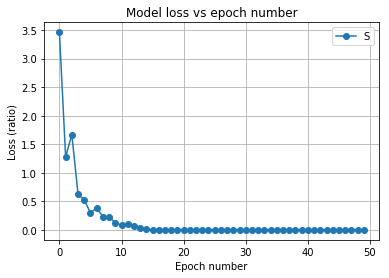

In [97]:
#Loss versus epochs

plt.plot(neuralnet.history['loss'],'-o')
plt.title("Model loss vs epoch number")
plt.xlabel("Epoch number")
plt.ylabel("Loss (ratio)")
plt.legend("SGD")
plt.grid()
plt.show()

In [81]:
#predictions

y_pred = model.predict(X_test)
rounded = [round(x[0]) for x in y_pred]

In [82]:
#Reporting accuracy

scores = model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

90/90 [==============================] - 0s 1ms/step

acc: 92.22%


In [83]:
#comparing test with predictions

print(Y_test)
print(rounded)

[1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0]


In [84]:
#Getting weights

weightmatrix = layer1.get_weights()
# wt2 = layer2.get_weights()
# print(wt2)
#print(len(weightmatrix[0]))
mat = np.asarray(weightmatrix[0])
print(np.shape(mat))
np.savetxt("weights.txt",mat)

(385, 100)


In [85]:
#Getting mean of weights for each neuron

meanvec = np.mean(mat, axis =1)

In [87]:
print(meanvec.shape)

(385,)


In [100]:
#Labeling neuron based on motion

positive = []
posvals = []
negative = []
negvals = []
noact = []
noactvals = []
for i in range(0, len(meanvec)):
    if (meanvec[i] < -0.01):
        negative.append(i)
        negvals.append(meanvec[i])
    elif (meanvec[i] > 0.01):
        positive.append(i)
        posvals.append(meanvec[i])
    else:
        noact.append(i)
        noactvals.append(meanvec[i])
print(positive)
print()
print(negative)
print()
print(noact)

[7, 25, 29, 49, 66, 75, 91, 111, 114, 119, 123, 126, 137, 138, 145, 154, 191, 207, 209, 238, 245, 253, 270, 271, 272, 278, 303, 322, 325, 334, 348, 353]

[1, 4, 8, 10, 23, 32, 41, 50, 74, 81, 85, 87, 103, 104, 121, 131, 132, 140, 165, 174, 183, 204, 220, 240, 246, 249, 259, 287, 288, 291, 294, 298, 337, 338, 358, 367, 377]

[0, 2, 3, 5, 6, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 82, 83, 84, 86, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 105, 106, 107, 108, 109, 110, 112, 113, 115, 116, 117, 118, 120, 122, 124, 125, 127, 128, 129, 130, 133, 134, 135, 136, 139, 141, 142, 143, 144, 146, 147, 148, 149, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 

In [146]:
#Motion neuron density calculation

crossover = len(meanvec) - 67

shallow_motion = sum(i > crossover for i in positive)
deep_motion = len(positive) - shallow_motion

shallow_both = sum(i > crossover for i in noact)
deep_both = len(noact) - shallow_both

shallow_negative = sum(i > crossover for i in negative)
deep_negative = len(negative) - shallow_negative


shallow_active_density = float( shallow_motion) / 67.0
deep_active_density = float( deep_motion) / float(crossover)

print(deep_active_density)
print(shallow_active_density)

0.08490566037735849
0.07462686567164178


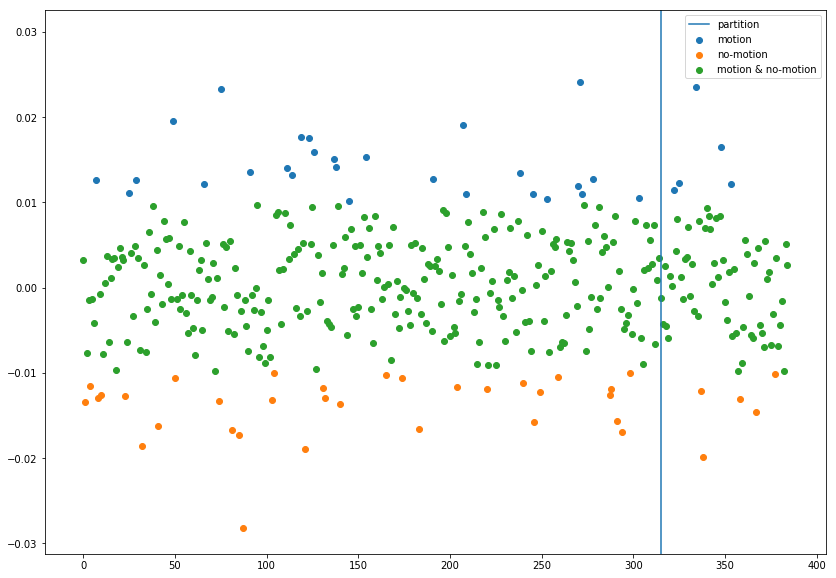

In [120]:
#Plotting neuron activity

plt.figure(figsize=(14,10))
plt.scatter(positive,posvals)
plt.scatter(negative,negvals)
plt.scatter(noact,noactvals)
plt.axvline(x=315)
plt.legend(['partition','motion','no-motion','motion & no-motion'])
plt.show()